# What it takes to be Data Scientist?
***

<img src='https://c2.staticflickr.com/8/7187/6964774217_53d449288a_b.jpg'>

## Table of Contents
***
* [1. Importing dataset and data preprocessing](#importing_dataset_and_data_preprocessing) <br>
   * [1.1. Importing essential libraries](#importing_essential_libraries) <br>
   * [1.2. Importing Datasets](#importing_datasets) <br>
   * [1.3. Let's try to summarize the Datasets](#lets_summarize_the_dataset) <br>

## 1. Importing dataset and data preprocessing
<a id="importing_dataset_and_data_preprocessing"></a>

### .1. Importing essential libraries
<a id="importing_essential_libraries"></a>

In [52]:
import numpy as np
import pandas as pd
import geopandas as gpd
from scipy.optimize import curve_fit
import seaborn as sns

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib as mpl
%matplotlib inline

import cartopy
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

### 2.2. Importing Datasets
<a id="importing_datasets"></a>

In [3]:
multiple_choice = pd.read_csv("../00_Datasets/Kaggle_Survey/multipleChoiceResponses.csv", encoding="ISO-8859-1", low_memory=False)


In [49]:
nationality = multiple_choice['Country'].value_counts()
nationality_count = nationality.divide(nationality.max()).to_dict()

In [50]:
nationality_count

{'Argentina': 0.021920419347152727,
 'Australia': 0.10030974505599237,
 'Belarus': 0.012866333095067906,
 'Belgium': 0.021682153919466287,
 'Brazil': 0.11079342387419586,
 'Canada': 0.10483678818203479,
 'Chile': 0.012151536812008578,
 'Colombia': 0.026923993328568024,
 'Czech Republic': 0.012628067667381462,
 'Denmark': 0.018584703359542529,
 'Egypt': 0.015725518227305217,
 'Finland': 0.01596378365499166,
 'France': 0.10531331903740768,
 'Germany': 0.10960209673576364,
 'Greece': 0.019299499642601858,
 'Hong Kong': 0.015487252799618776,
 'Hungary': 0.015725518227305217,
 'India': 0.64426971646414111,
 'Indonesia': 0.031212771026923995,
 'Iran': 0.026685727900881581,
 'Ireland': 0.022396950202525613,
 'Israel': 0.025017869907076482,
 'Italy': 0.056707171789373359,
 'Japan': 0.06599952346914463,
 'Kenya': 0.01405766023350012,
 'Malaysia': 0.018822968787228972,
 'Mexico': 0.030021443888491779,
 'Netherlands': 0.048844412675720754,
 'New Zealand': 0.017631641648796759,
 'Nigeria': 0.01739

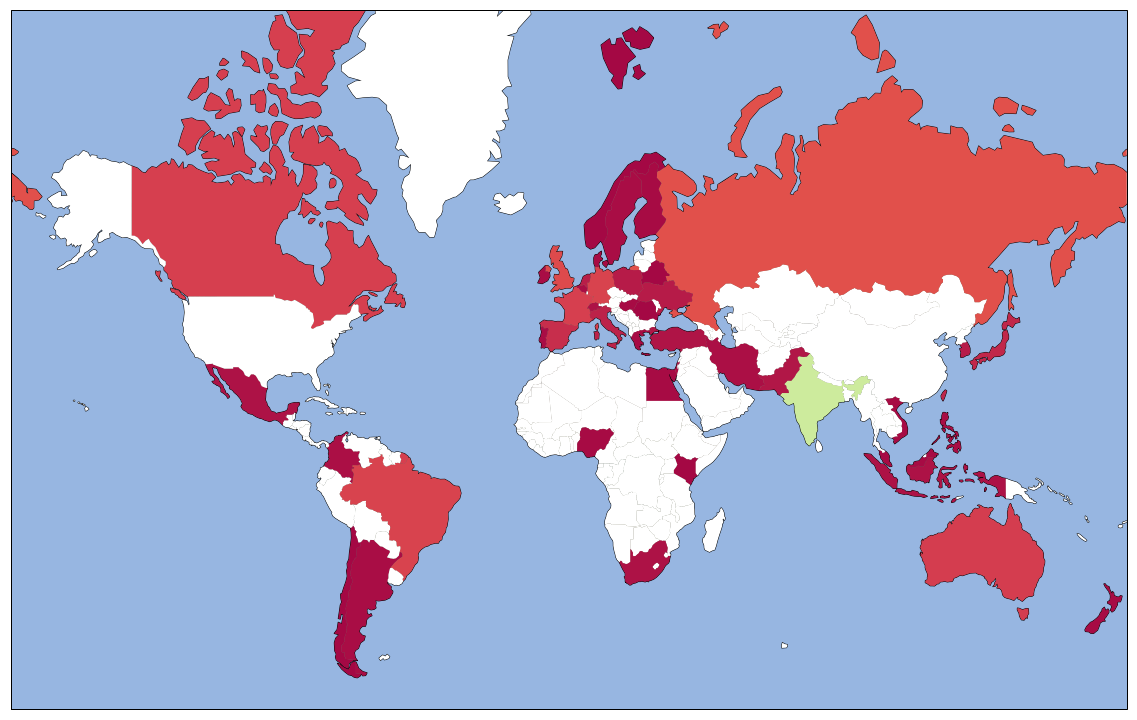

In [56]:
cmap = mpl.cm.get_cmap('Spectral')
# Creating new plot
plt.figure(figsize=(20,20))

ax = plt.axes(projection=ccrs.Mercator())
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=.5)

ax.set_extent([-150, 60, -25, 60])
ax.stock_img()
ax.coastlines()

shpfilename = shpreader.natural_earth(resolution='110m',
                                      category='cultural',
                                      name='admin_0_countries')
reader = shpreader.Reader(shpfilename)
countries = reader.records()

for country in countries:
    if country.attributes['ADMIN'] in list(nationality_count.keys()):
        ax.add_geometries(country.geometry, ccrs.PlateCarree(),
                          facecolor=cmap(nationality_count[country.attributes['ADMIN']]),
                          label=country.attributes['ADMIN'])
    else:
        ax.add_geometries(country.geometry, ccrs.PlateCarree(),
                          facecolor='white',
                          label=country.attributes['ADMIN'])


plt.show()

In [27]:

shpfilename = shpreader.natural_earth(resolution='110m',
                                      category='cultural',
                                      name='admin_0_countries')
reader = shpreader.Reader(shpfilename)
countries = reader.records()

for country in countries:
    print(country.attributes['ADMIN'])

Afghanistan
Angola
Albania
United Arab Emirates
Argentina
Armenia
Antarctica
French Southern and Antarctic Lands
Australia
Austria
Azerbaijan
Burundi
Belgium
Benin
Burkina Faso
Bangladesh
Bulgaria
The Bahamas
Bosnia and Herzegovina
Belarus
Belize
Bolivia
Brazil
Brunei
Bhutan
Botswana
Central African Republic
Canada
Switzerland
Chile
China
Ivory Coast
Cameroon
Democratic Republic of the Congo
Republic of the Congo
Colombia
Costa Rica
Cuba
Northern Cyprus
Cyprus
Czechia
Germany
Djibouti
Denmark
Dominican Republic
Algeria
Ecuador
Egypt
Eritrea
Spain
Estonia
Ethiopia
Finland
Fiji
Falkland Islands
France
Gabon
United Kingdom
Georgia
Ghana
Guinea
Gambia
Guinea-Bissau
Equatorial Guinea
Greece
Greenland
Guatemala
Guyana
Honduras
Croatia
Haiti
Hungary
Indonesia
India
Ireland
Iran
Iraq
Iceland
Israel
Italy
Jamaica
Jordan
Japan
Kazakhstan
Kenya
Kyrgyzstan
Cambodia
South Korea
Kosovo
Kuwait
Laos
Lebanon
Liberia
Libya
Sri Lanka
Lesotho
Lithuania
Luxembourg
Latvia
Morocco
Moldova
Madagascar
Mexico
M

In [18]:
for x in countries:
    print(x)

Record(MULTIPOLYGON (((61.21081709172574 35.65007233330923, 62.23065148300589 35.27066396742229, 62.98466230657661 35.40404083916762, 63.19353844590035 35.85716563571891, 63.98289594915871 36.0079574651466, 64.5464791197339 36.31207326918427, 64.74610517767741 37.1118177353333, 65.58894778835784 37.30521678318564, 65.74563073106683 37.66116404881207, 66.21738488145934 37.39379018813392, 66.51860680528867 37.36278432875879, 67.07578209825962 37.35614390720929, 67.82999962755952 37.14499400486469, 68.13556237170138 37.02311513930431, 68.85944583524594 37.3443358424306, 69.19627282092438 37.15114350030743, 69.51878543485796 37.60899669041342, 70.11657840361033 37.58822276463209, 70.27057417184014 37.73516469985402, 70.3763041523093 38.13839590102752, 70.80682050973289 38.48628164321642, 71.34813113799026 38.25890534113216, 71.23940392444817 37.95326508234189, 71.54191775908478 37.90577444106565, 71.44869347523024 37.06564484308052, 71.84463829945059 36.73817129164692, 72.1930408059624 36.

Record(MULTIPOLYGON (((48.58435339611344 41.8088687916207, 47.98728315612598 41.40581920019423, 47.8156657244846 41.15141612402138, 47.37331546406628 41.21973236751117, 46.6860705910166 41.82713715266993, 46.40495079934882 41.86067515722731, 45.77640000000005 42.09244000000018, 45.47027916848572 42.50278066666998, 44.53762291848199 42.71199270280363, 43.93121000000011 42.55496000000014, 43.75599000000014 42.7408300000001, 42.39440000000016 43.22030000000007, 40.92219000000014 43.38215000000017, 40.07696495947977 43.55310415300232, 39.95500857927092 43.43499766699922, 38.67999999999998 44.28000000000011, 37.53912000000005 44.65721000000002, 36.67546000000007 45.24469000000011, 37.40317000000013 45.40451000000013, 38.23295000000005 46.24087000000003, 37.67372000000003 46.63657000000001, 39.14767000000015 47.04475000000016, 39.12120000000007 47.26336000000012, 38.22353803889933 47.10218984637595, 38.25511233902986 47.54640045835691, 38.77057000000011 47.82562000000019, 39.73827762223885 4

C:\Users\AFGHAN92\Anaconda3\lib\site-packages\cartopy\io\__init__.py:264: DownloadWarning:

Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip



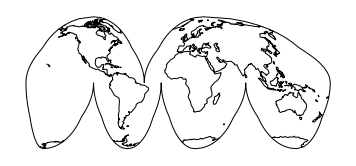

In [20]:
ax = plt.axes(projection=ccrs.InterruptedGoodeHomolosine())
ax.coastlines()
plt.show()